<a href="https://colab.research.google.com/github/tharunalla/DeepLearning/blob/main/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploratory

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time

# Load the dataset
data_path = "Custom_CNN_Features.csv"
data = pd.read_csv(data_path)

# Drop the first column (image file names)
data = data.iloc[:, 1:]

# EDA: Data types of attributes
print(data.dtypes)

# EDA: Check for missing values
missing_values = data.isnull().sum()
print("Missing values:", missing_values[missing_values > 0])

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For non-numeric columns, fill missing values with a placeholder (e.g., 'Unknown')
data[non_numeric_cols] = data[non_numeric_cols].fillna('Unknown')

print("Missing values handled successfully.")

Class Label      int64
f0             float64
f1             float64
f2             float64
f3             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 201, dtype: object
Missing values: Series([], dtype: int64)
Missing values handled successfully.


Class distribution:
 Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


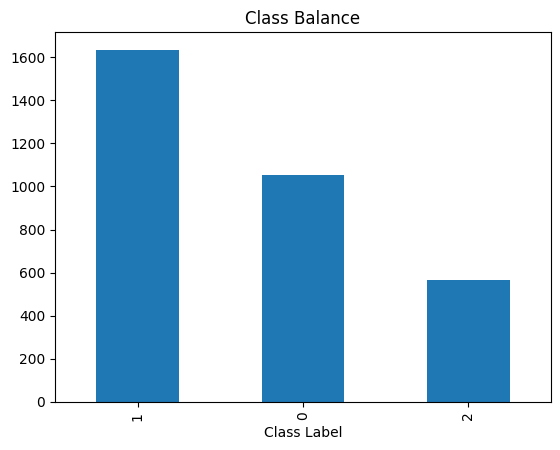

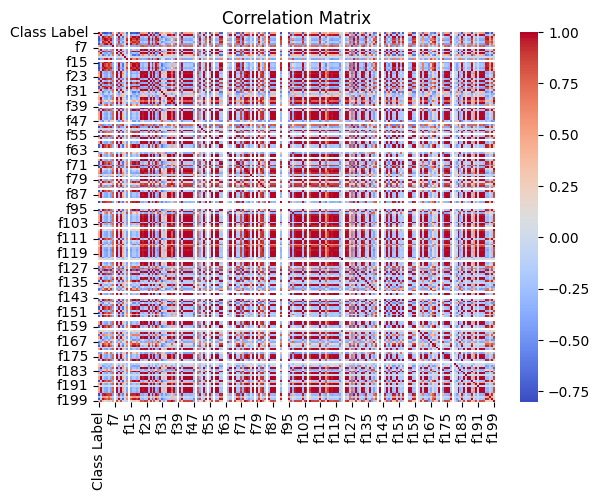

Matrix Rank: 174


In [21]:
# EDA: Class balance
distribution = data['Class Label'].value_counts()
print("Class distribution:\n", distribution)
distribution.plot(kind='bar', title='Class Balance')
plt.show()

# EDA: Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# EDA: Matrix rank
data_matrix = data.drop('Class Label', axis=1).values
matrix_rank = np.linalg.matrix_rank(data_matrix)
print("Matrix Rank:", matrix_rank)

In [22]:
# EDA: Data range and normalization
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_matrix)
print("Normalized data range:\nMin:", normalized_data.min(), "Max:", normalized_data.max())

Normalized data range:
Min: -1.7885459649985487 Max: 57.02630971753302


Applying Machine Learning Models

In [24]:
# Split dataset
X = data.drop('Class Label', axis=1)
y = data['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate classifiers
results = []
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = clf.predict(X_test)
    pred_time = time.time() - start_time

    report = classification_report(y_test, y_pred, output_dict=True)
    auroc = roc_auc_score(pd.get_dummies(y_test), clf.predict_proba(X_test), multi_class='ovr')

    results.append({
        "Classifier": name,
        "Accuracy": report['accuracy'],
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
        "AUROC": auroc,
        "Train Time": train_time,
        "Prediction Time": pred_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Identify best model
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print("Best Model:\n", best_model)

      Classifier  Accuracy  Precision    Recall  F1-Score     AUROC  \
0            kNN  0.928747   0.930303  0.928747  0.928758  0.967276   
1  Decision Tree  0.921376   0.922037  0.921376  0.921480  0.937258   
2            SVM  0.923833   0.927711  0.923833  0.924002  0.980214   
3  Random Forest  0.937346   0.939361  0.937346  0.937397  0.984853   
4    Naive Bayes  0.927518   0.928973  0.927518  0.927625  0.964958   

   Train Time  Prediction Time  
0    0.011111         0.076502  
1    0.361211         0.011726  
2    1.374951         0.196559  
3    2.318467         0.094833  
4    0.021169         0.014112  
Best Model:
 Classifier         Random Forest
Accuracy                0.937346
Precision               0.939361
Recall                  0.937346
F1-Score                0.937397
AUROC                   0.984853
Train Time              2.318467
Prediction Time         0.094833
Name: 3, dtype: object
